#### 回顾现有的时间序列预测知识

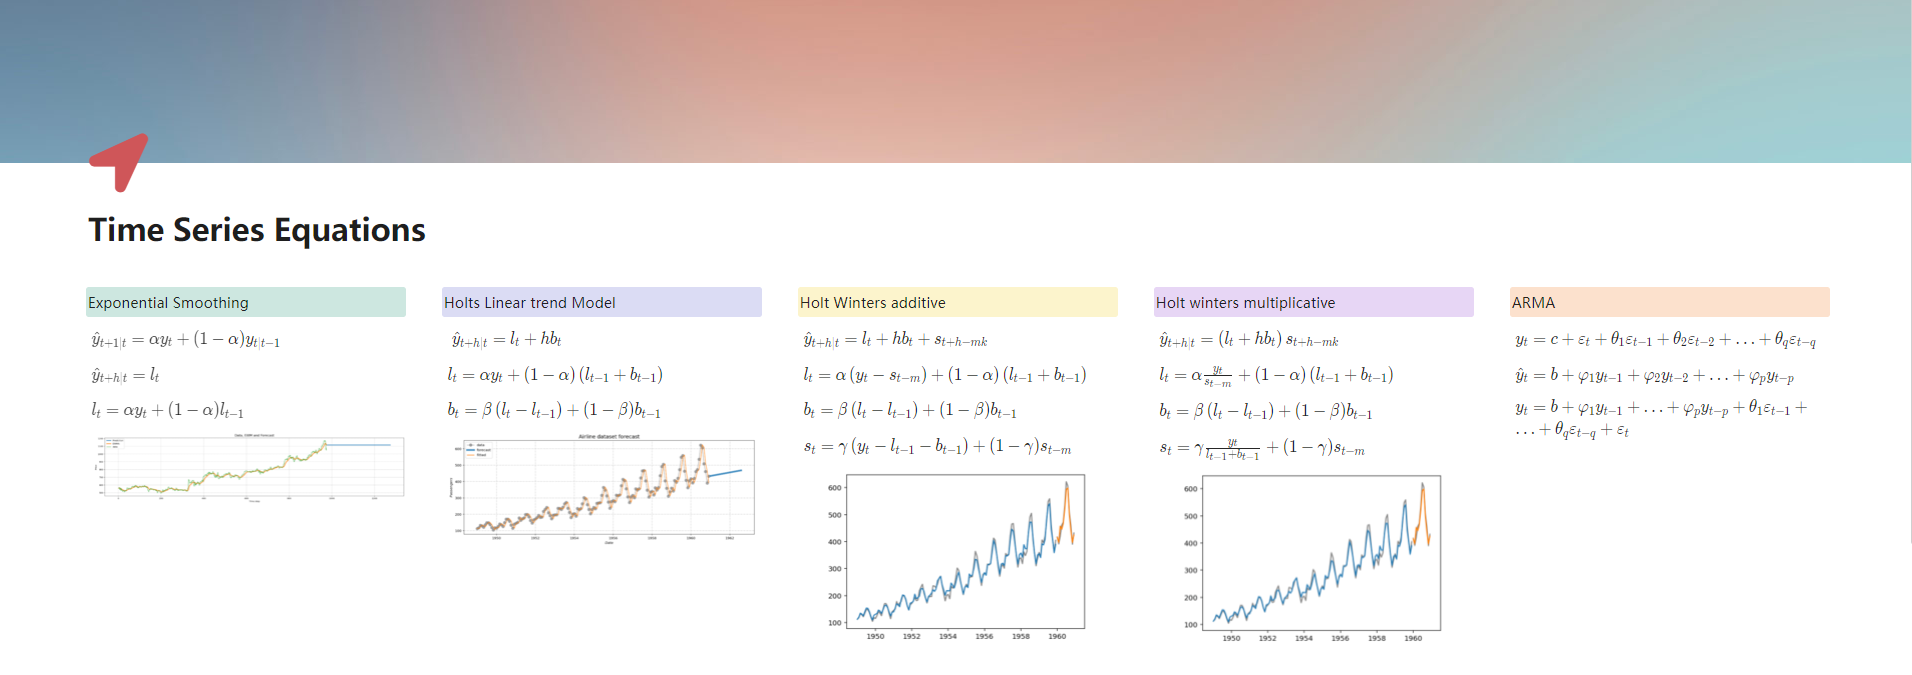

#### 基于lag的时间序列预测

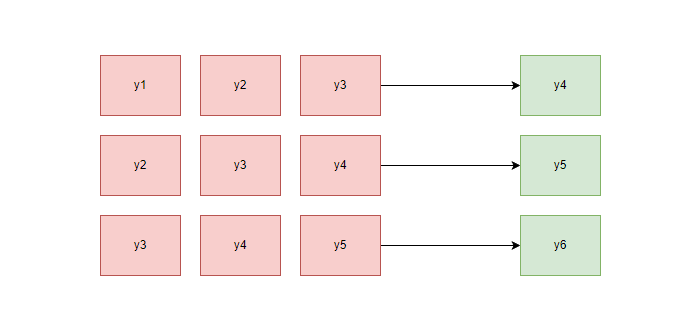

#### 基于lag的多步时间序列预测

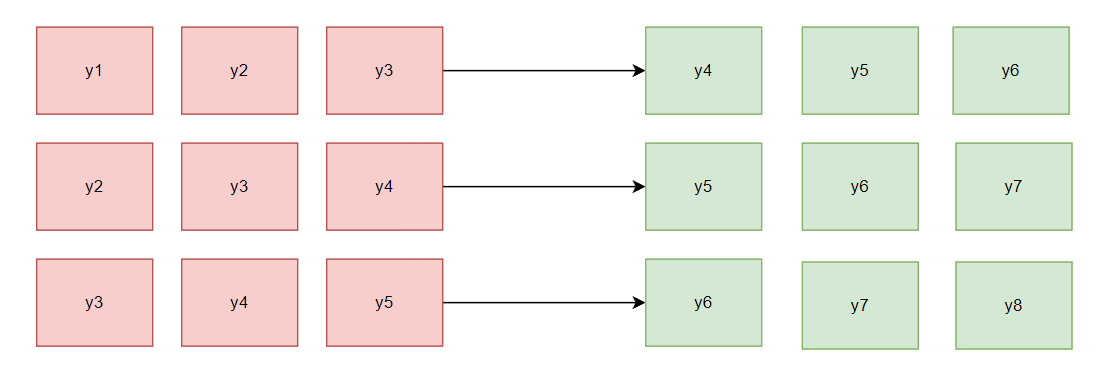

#### 多特征， 多步时间序列预测 $x_{ij}$ = 第$i$个特征的第$j$时间步
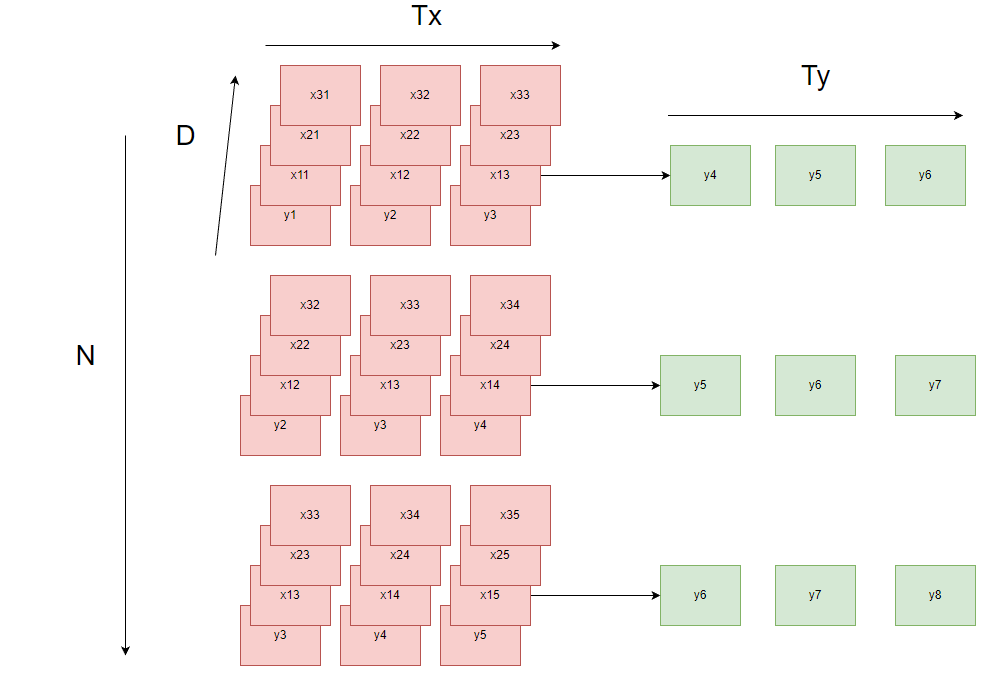

#### 多特征，多步， flatten时间序列预测

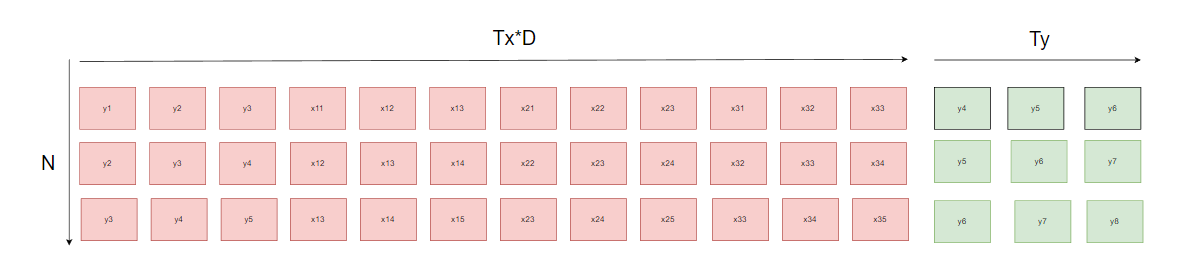

#### 多特征，多步，多指标时间序列预测
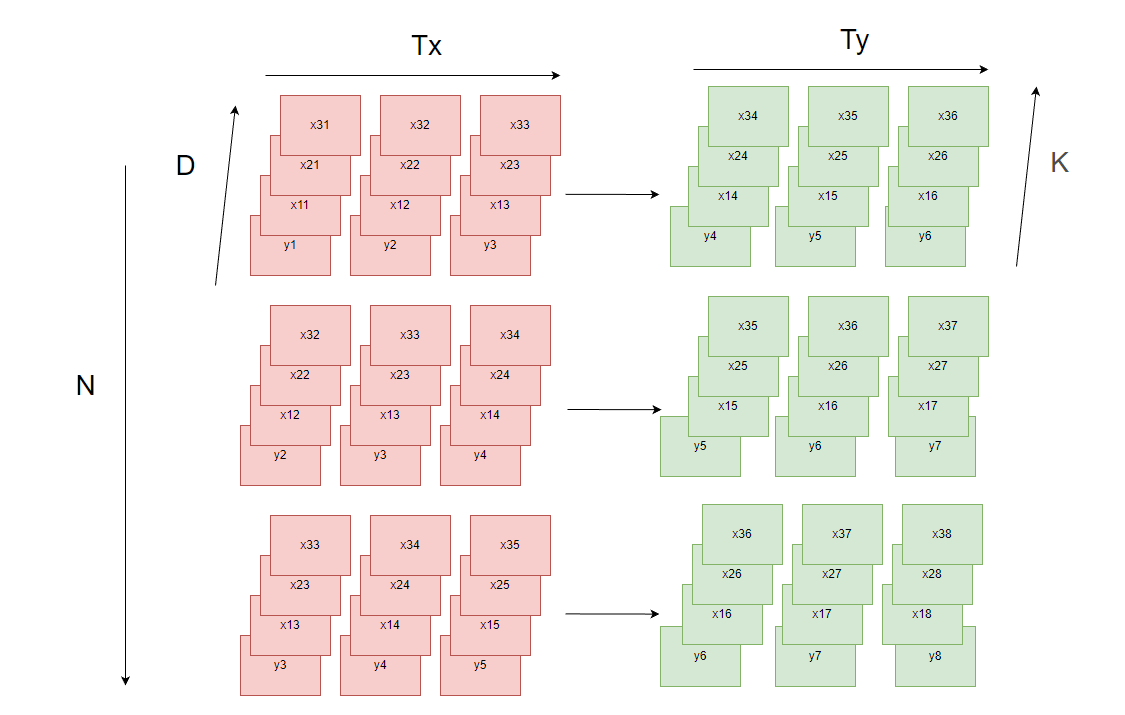

### Tensorflow Code View

In [82]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [4]:
df = pd.read_csv(csv_path)
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [5]:
pd.DataFrame(df).set_index(date_time)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


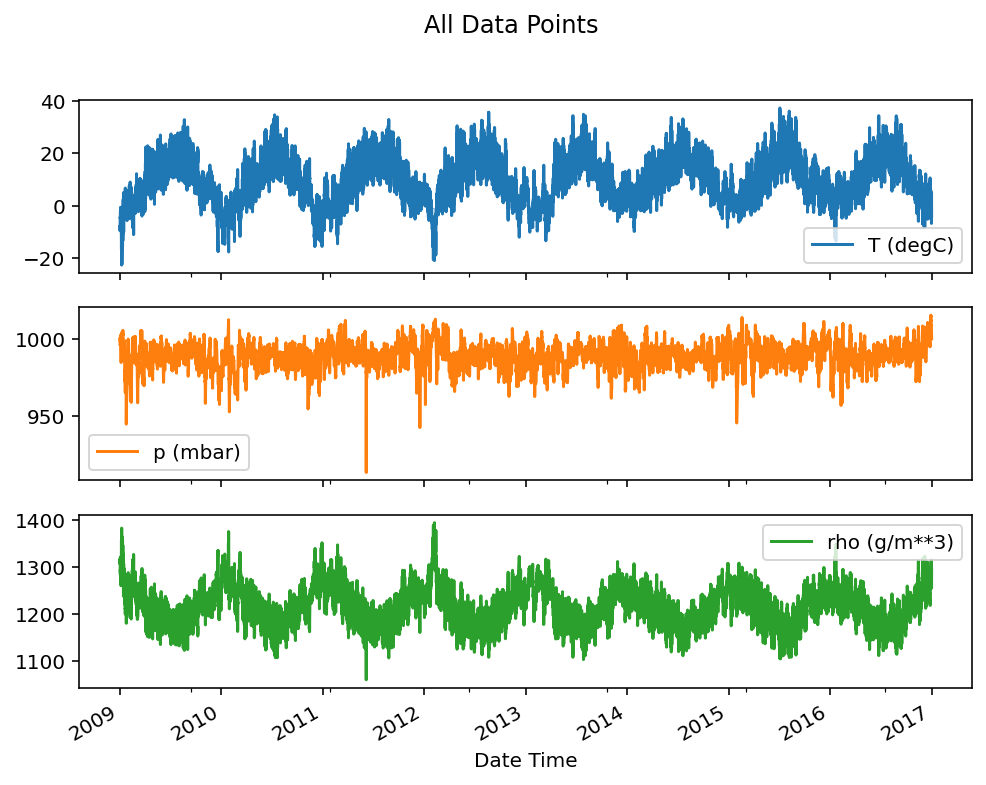

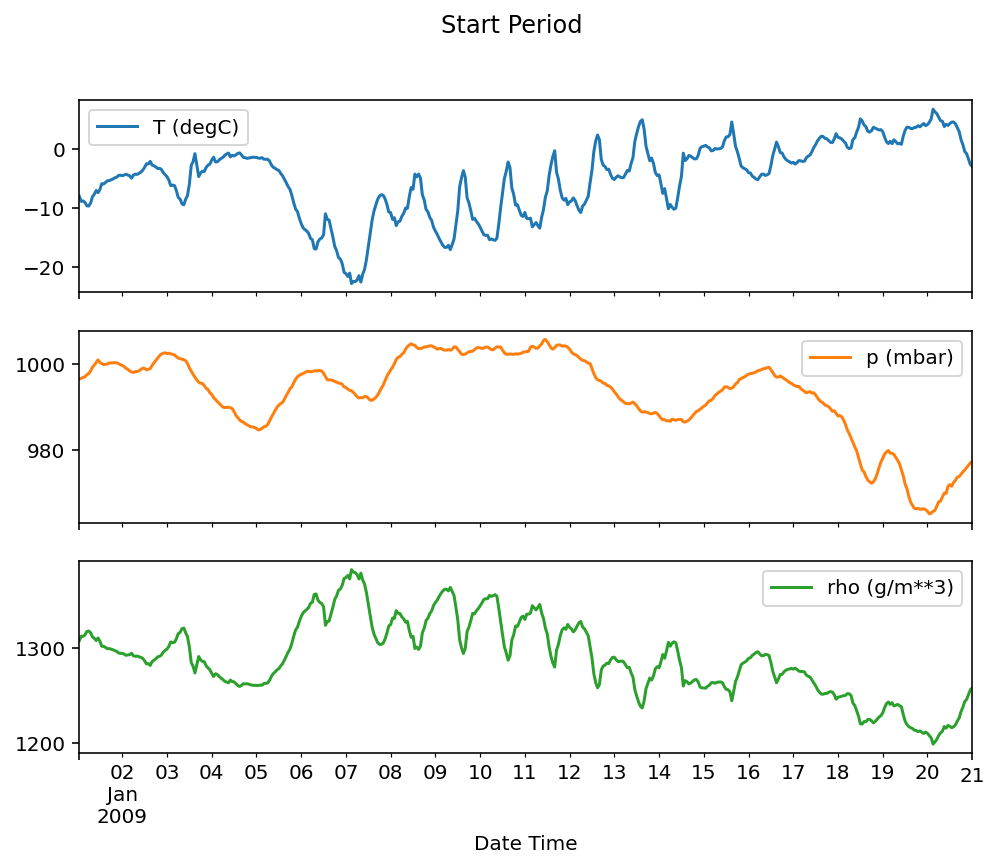

In [6]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plt.suptitle("All Data Points")

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)
plt.suptitle("Start Period")
plt.show()

长短周期混合数据


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


处理异常值

In [8]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

角度为200°的低速风为主

Text(0, 0.5, 'Wind Velocity [m/s]')

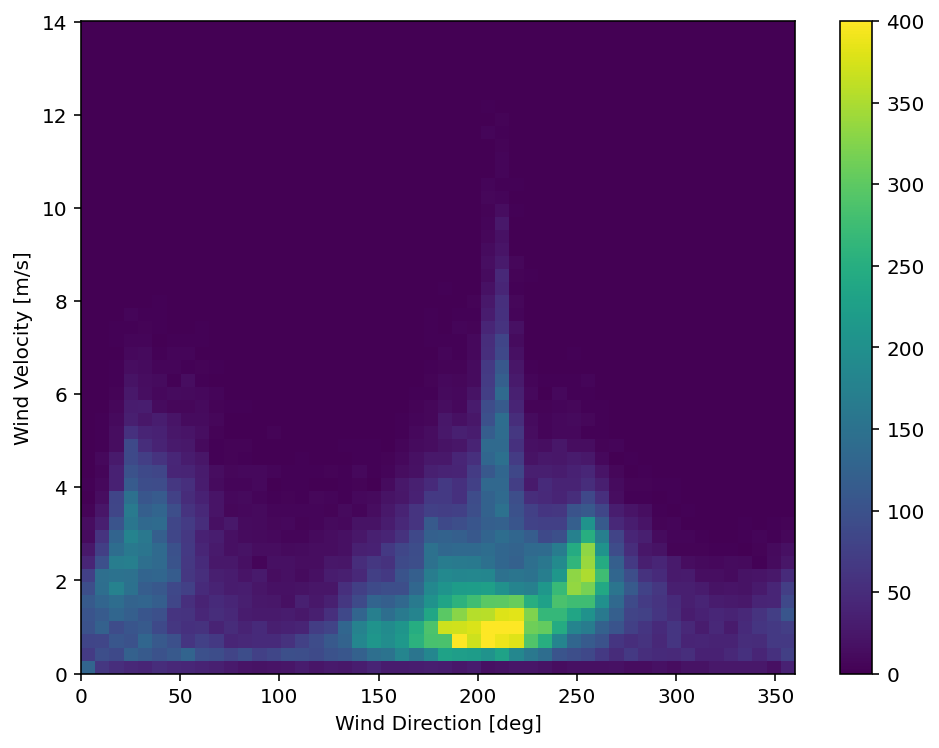

In [9]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

#### 特征工程

In [10]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# 角度转换为弧度
wd_rad = df.pop('wd (deg)')*np.pi / 180

# 转为为x方向和y方向的风速
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# x方向和y方向的最大风速
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

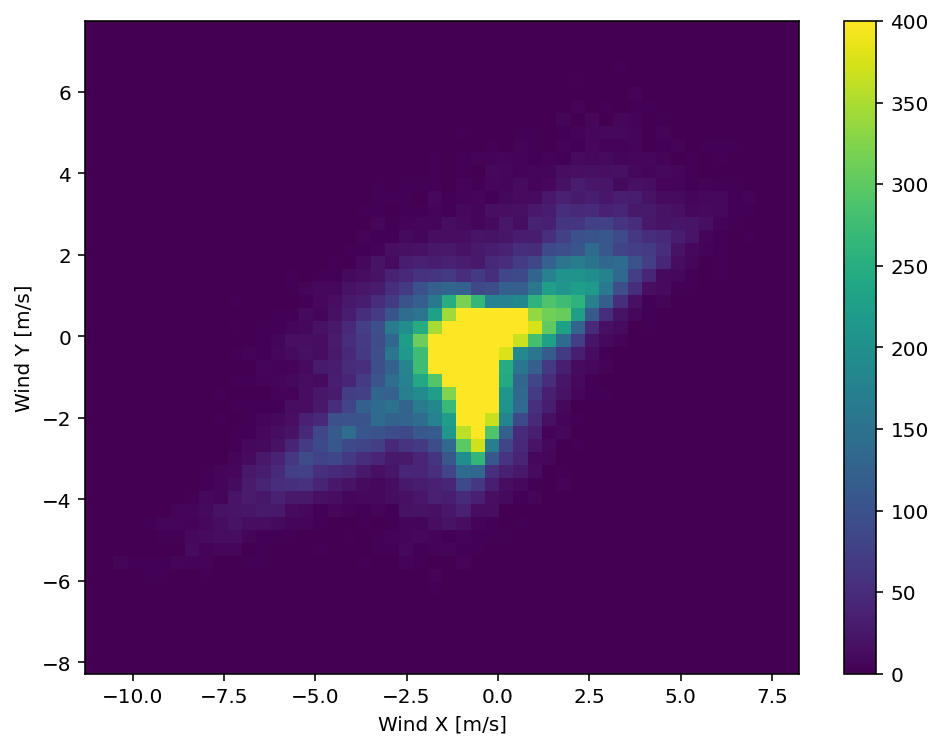

In [11]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

### 转换为整数时间戳

In [12]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

把整数的时间步转换成以日为周期的正弦波 ， 以日为周期的余弦波    
以及以年为周期的正弦波，以年为周期的余弦波


In [13]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

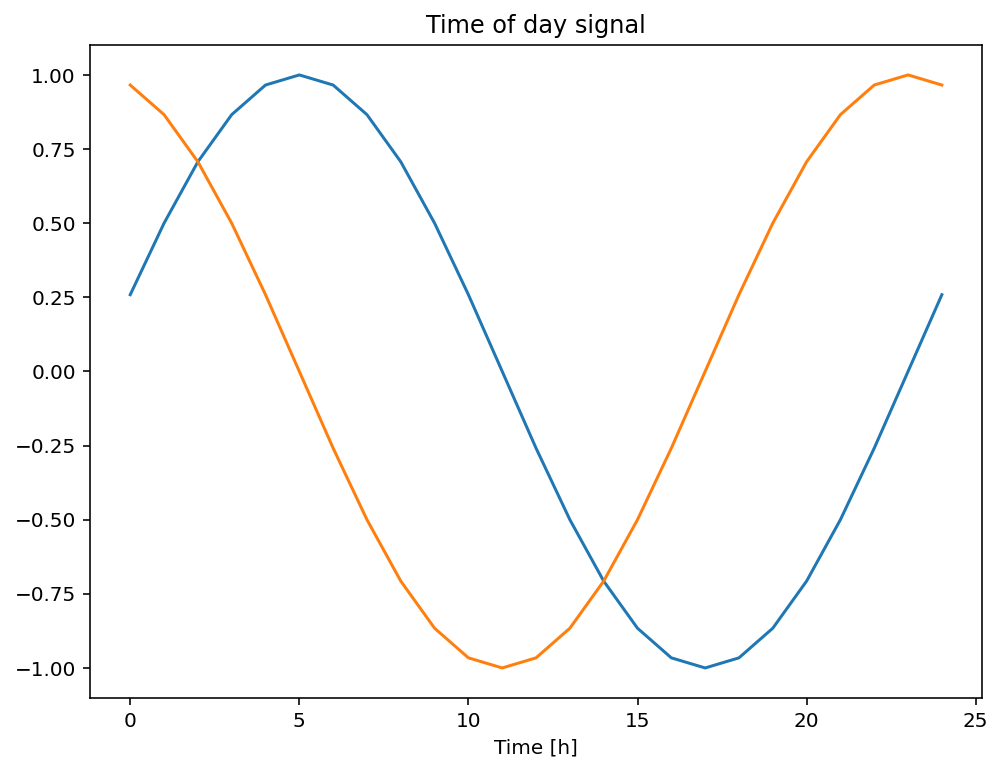

In [14]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of day signal')

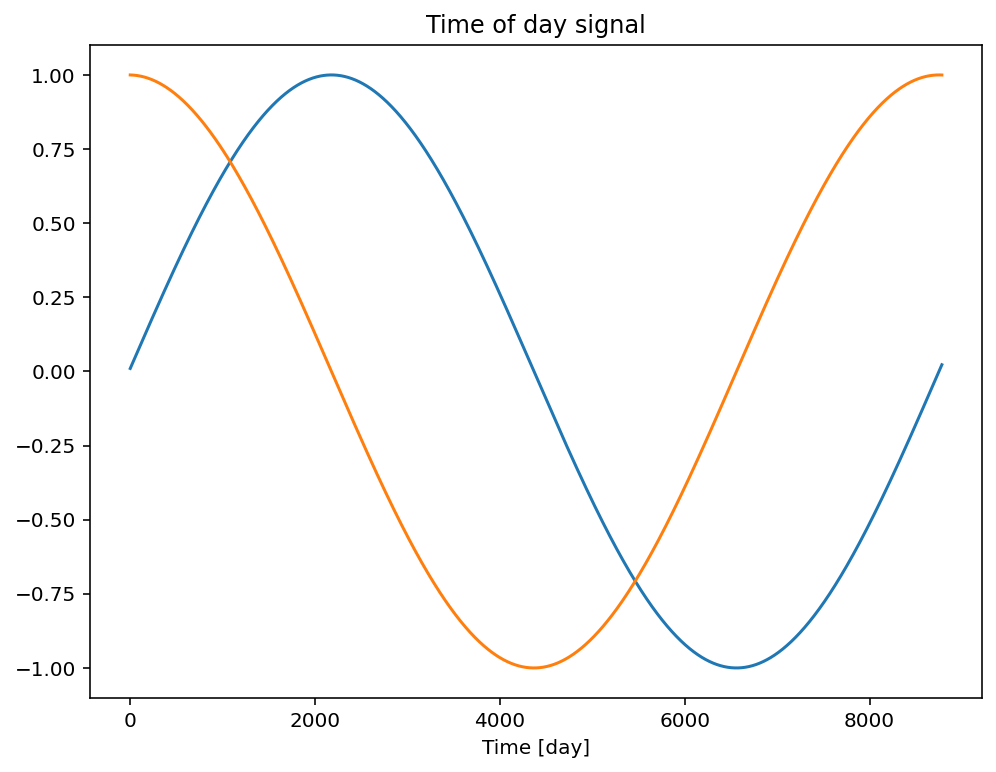

In [15]:
plt.plot(np.array(df['Year sin'])[:366*24])
plt.plot(np.array(df['Year cos'])[:366*24])
plt.xlabel('Time [day]')
plt.title('Time of day signal')

使用快速傅里叶变化检验温度的周期性

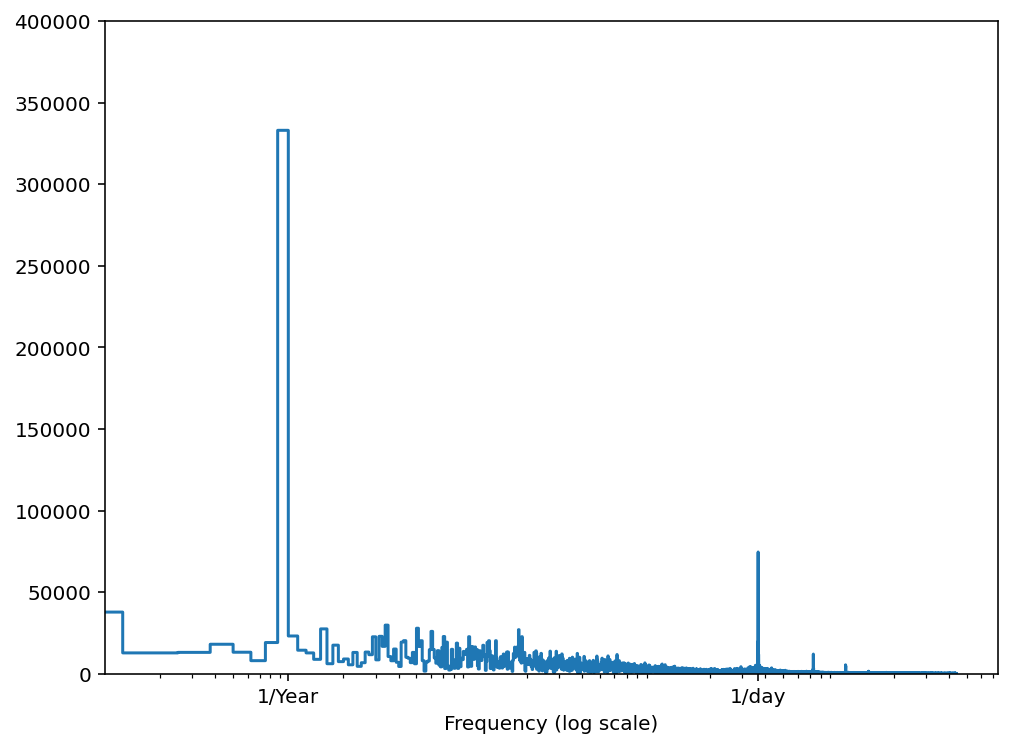

In [16]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

train test split

In [17]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

normalize

In [18]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

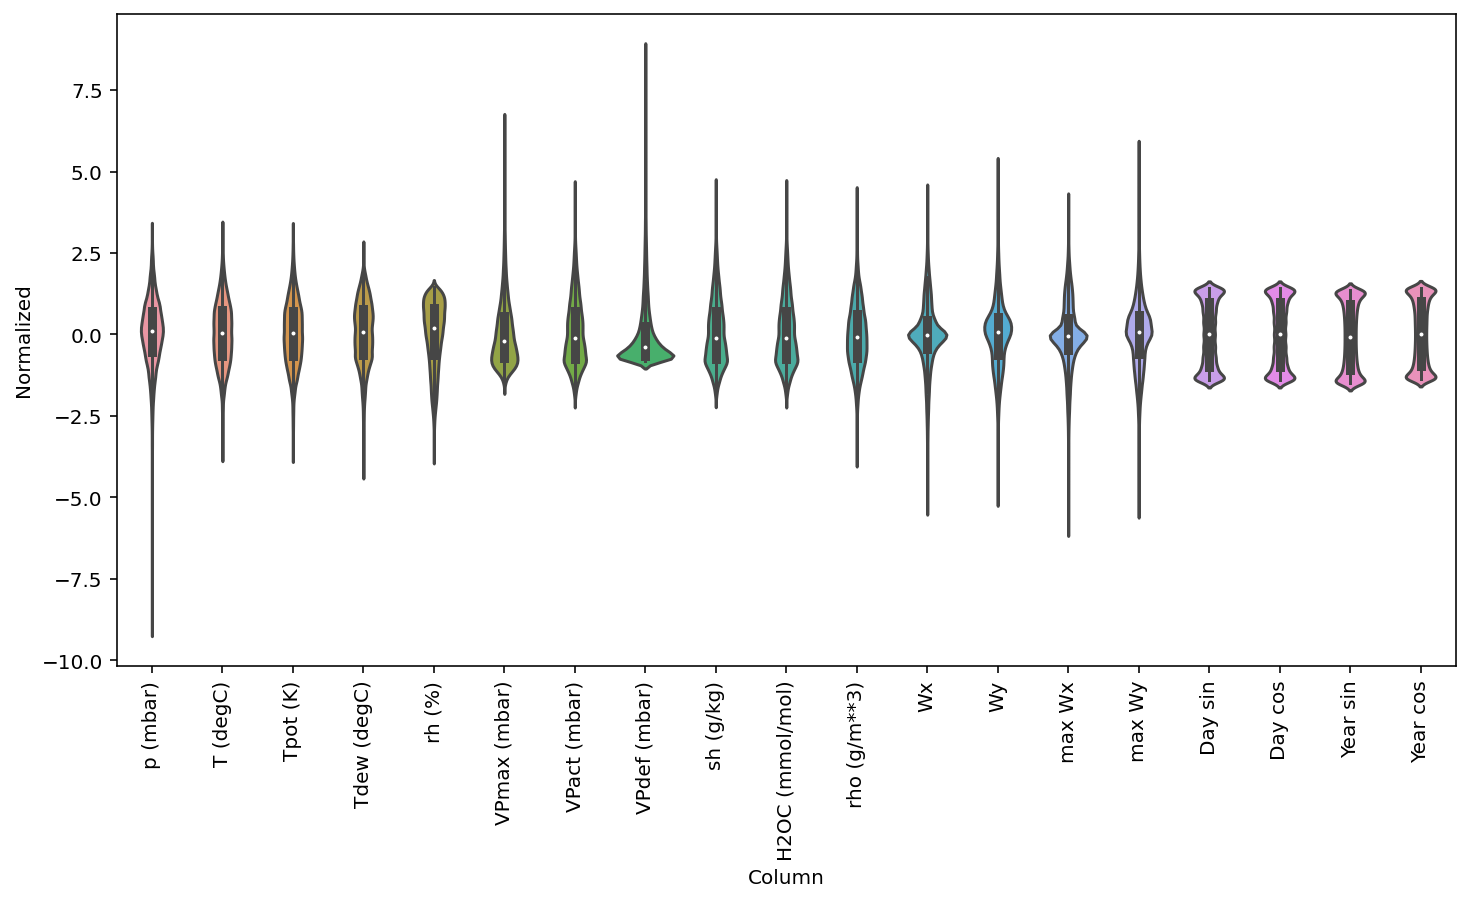

In [19]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Data windowing      
The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data.    
 
The main features of the input windows are:    

The width (number of time steps) of the input and label windows.   
The time offset between them.   
Which features are used as inputs, labels, or both.     
This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:    

Single-output, and multi-output predictions.   
Single-time-step and multi-time-step predictions.    
This section focuses on implementing the data windowing so that it can be reused for all of those models.   

Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:   

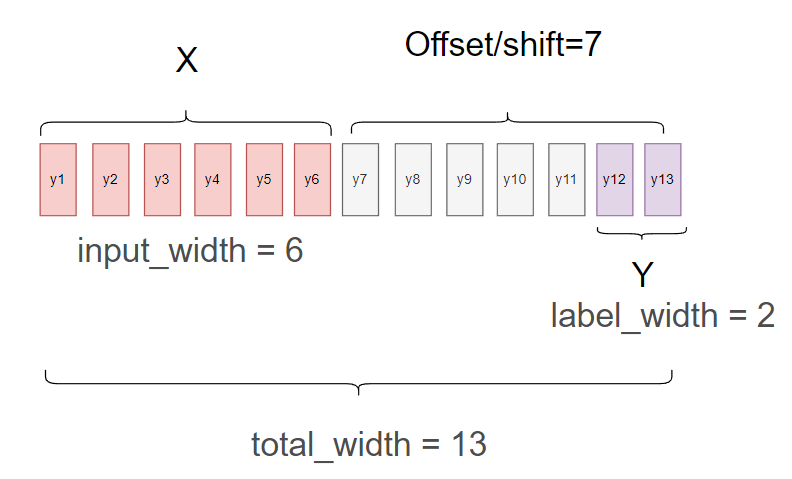

#### 二维数据转换为三维数据

In [20]:
import numpy as np
import pandas as pd
import string
import random
tdf = pd.DataFrame(np.arange(0,100), columns=['ts'])
tdf['str_col'] = np.random.randint(1,100,100)
tdf['str_col2'] = np.random.randint(1,100,100)
tdf

,ts,str_col,str_col2
0,0,40,19
1,1,20,46
2,2,13,48
3,3,35,75
4,4,87,33
...,...,...,...
95,95,74,3
96,96,53,21
97,97,84,25
98,98,40,56


In [21]:
sequence_dataset = tf.keras.utils.timeseries_dataset_from_array(
          data=tdf.values.astype(float),
          targets=None,
          sequence_length=6,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

for element in sequence_dataset:
    print(element.shape)

(32, 6, 3)
(32, 6, 3)
(31, 6, 3)


In [22]:
# for element in sequence_dataset:
#     print(element)
#     break

In [23]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        
        """
        input_width:输入长度
        label_width:目标长度
        shift: 偏移
        train_df:训练数据集
        val_df: 验证数据集
        test_df:测试数据集
        label_columns:要预测哪些目标
        """
        
        # 把数据集存起来
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # 找到要预测的是哪些列， 如果没有传这个参数，就是预测训练集中的所有列
        # label_columns_indices存储要预测的列的列索引
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
            
        # 数据集每一列的列索引
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # 窗口参数
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        # 应该是 input + offset = input + 空窗期 + horizon
        self.total_window_size = input_width + shift
        
        # 下面的label indices和input_indices都是指时间步
        
        # 这边定义了怎么切窗口，从时间步0开始，切出input_width窗口大小
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        # 窗口大小 - 预测长度，就是预测目标的开始
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        """这个function可以接收N，T, D的数据，但是在function内部调用的时候，一般是 （1， Tx + shift, D + K）"""
        # 给定一个三维数组features （1， Tx + shift, D + K）
        # 希望找到 x = (1, Tx, D), y = (1, Ty, K)
        
        # 保持了feature矩阵的所有特征， 和label矩阵的所有特征
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            # 如果我们要预测多列，我们要知道到底预测的是哪一列
            # 从这儿我们也可以知道，传过来的features，也包含了target
            # 通过column indices取得
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        
        # 这边的shape操作看着像是tensor特有的操作，就是保持张量的形状信息
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        
    def make_dataset(self, data):
        """所以我们现在知道，这里二维数据已经转化成了三维数据"""
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)
        
        # 对三维数据里面的每一个数据点，做一个逐元素的map操作
        # 这里只是total window size大小的数据集，并没有区分feature和target

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    # 这里做了一个python的迭代器， 通过这个迭代器就能出成对的x, y了
    
    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

#### Example 1

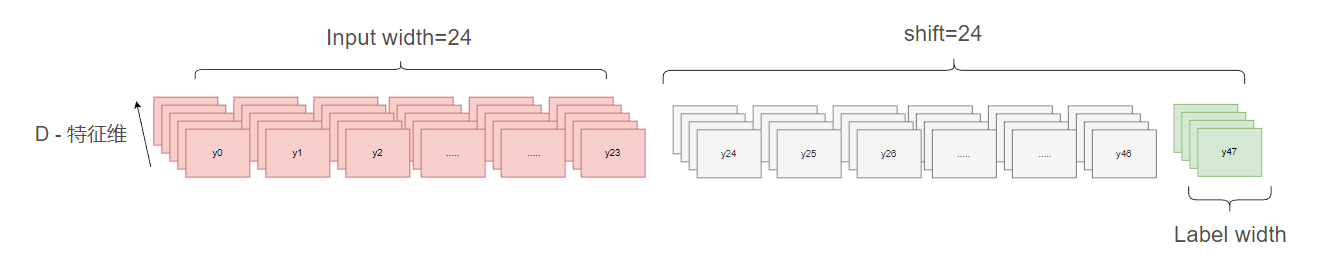

In [24]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

1个样本的总长度是48      
特征的索引是0-23，总共24个时间步    
由于空窗期shift = 24     
label的索引是47， 总共1个时间步骤      
我们希望预测温度列       

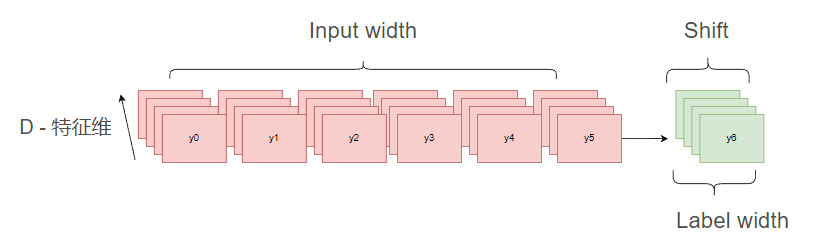

### Example 2

In [25]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

In [26]:
w2.example[0].shape,w2.example[1].shape

(TensorShape([32, 6, 19]), TensorShape([32, 1, 1]))

我们有3个training example       
每一个example有6个时间步的信息      
有一个输出的信息，窗口为1步，需要预测1个指标

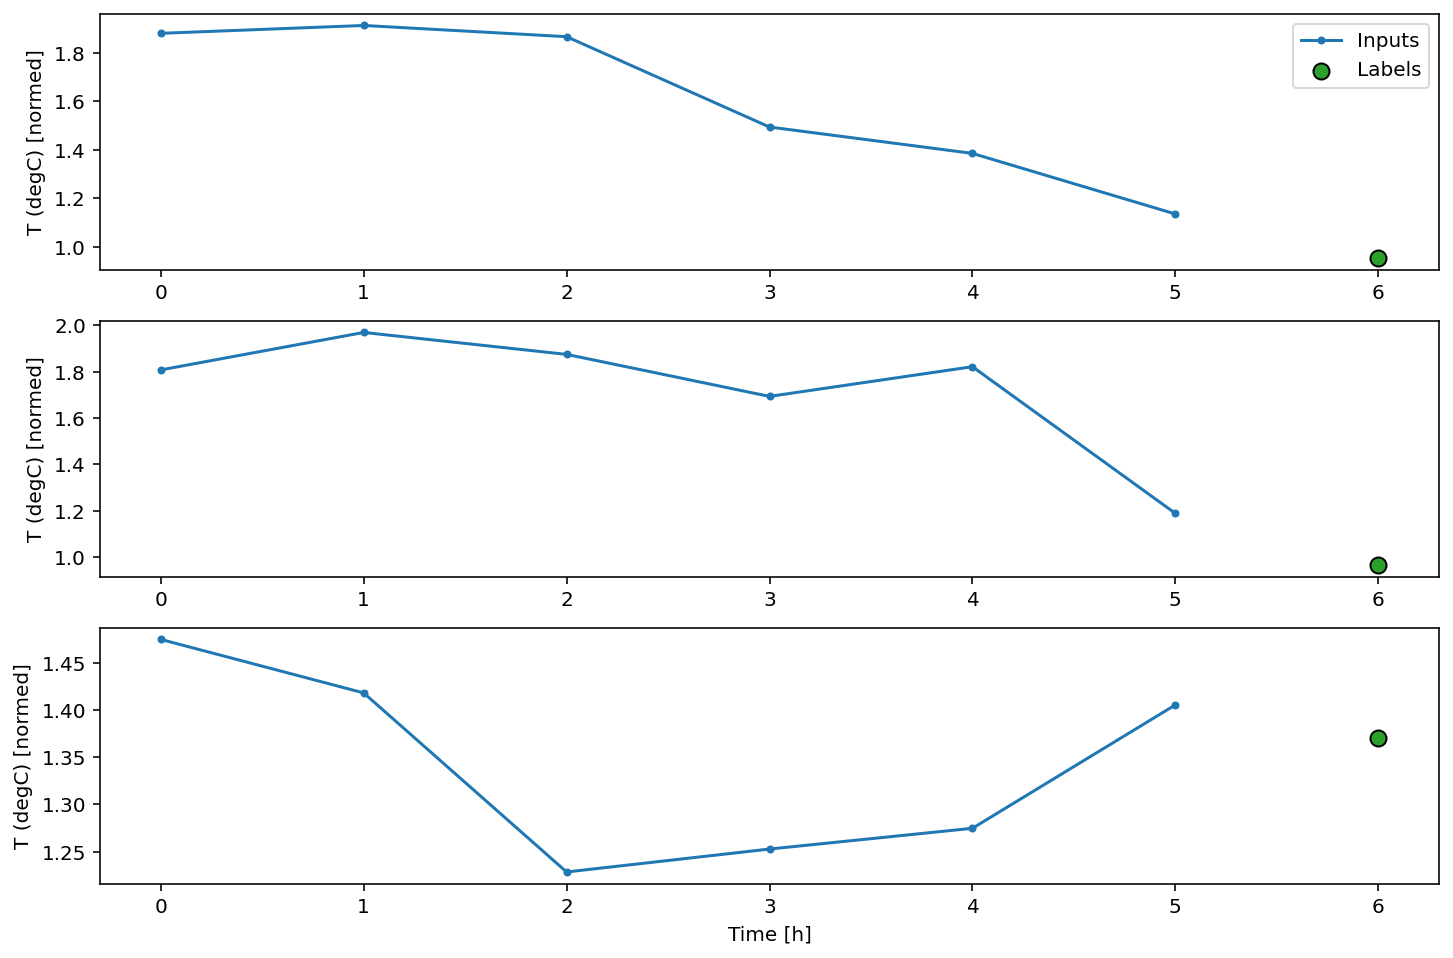

In [27]:
w2.plot()

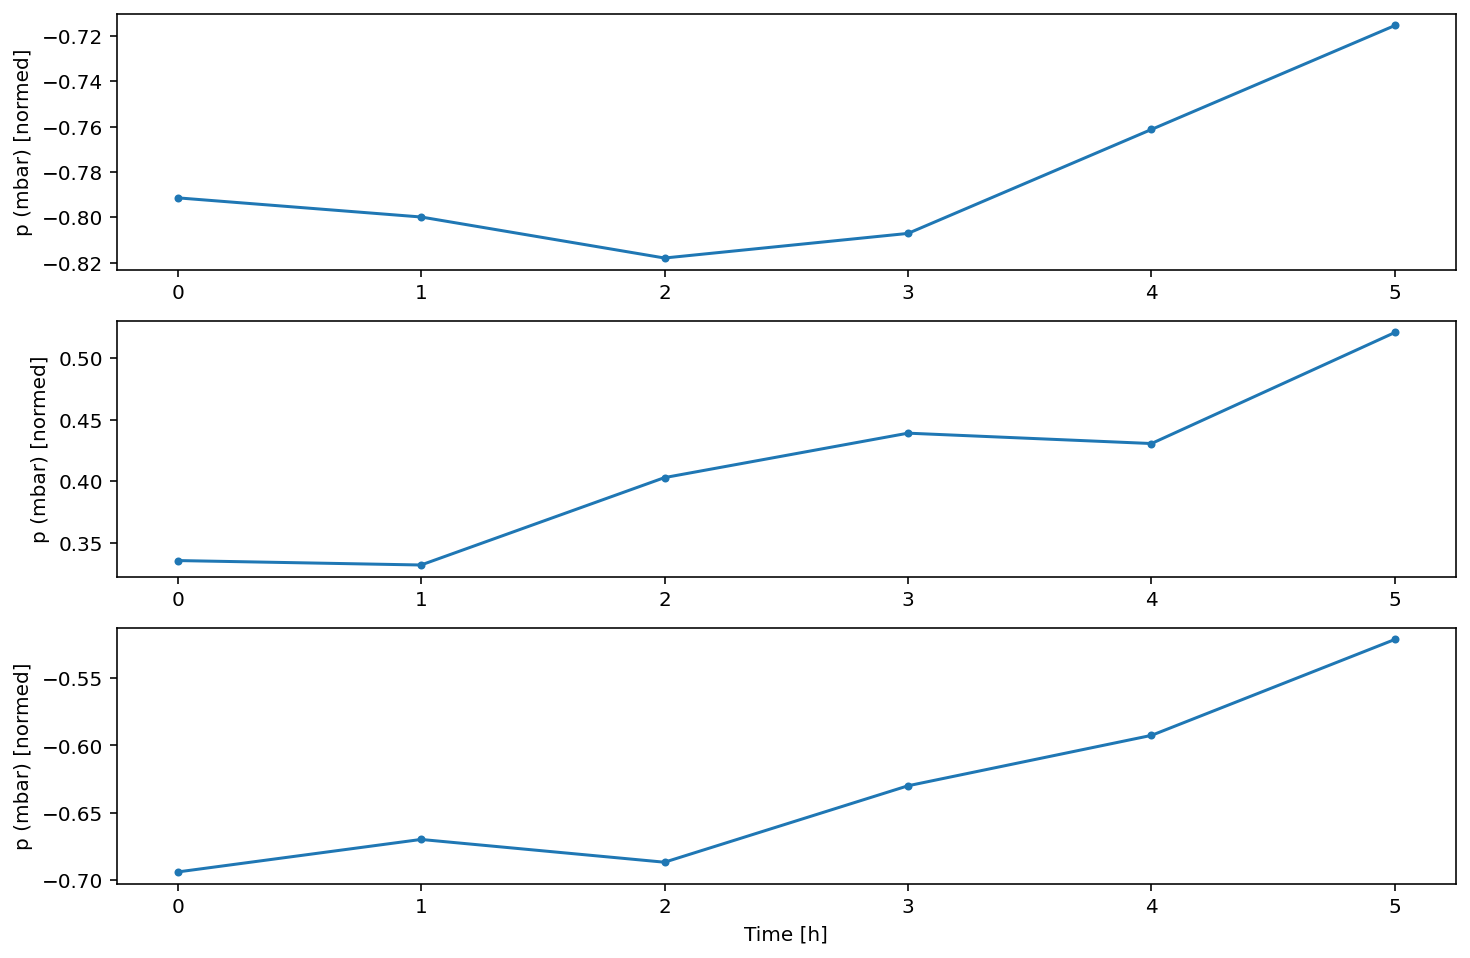

In [28]:
w2.plot(plot_col='p (mbar)')

In [29]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [30]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


#### Single Step Prediction

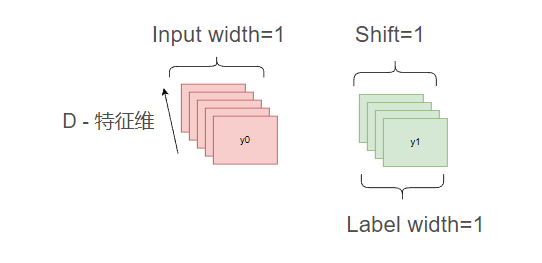

In [31]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [32]:
class Baseline(tf.keras.Model):
    """基准线模型，把输入直接返回当作下一步的输出， copy previous"""
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [33]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 0s 607us/step - loss: 0.0128 - mean_absolute_error: 0.0785


In [34]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [35]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


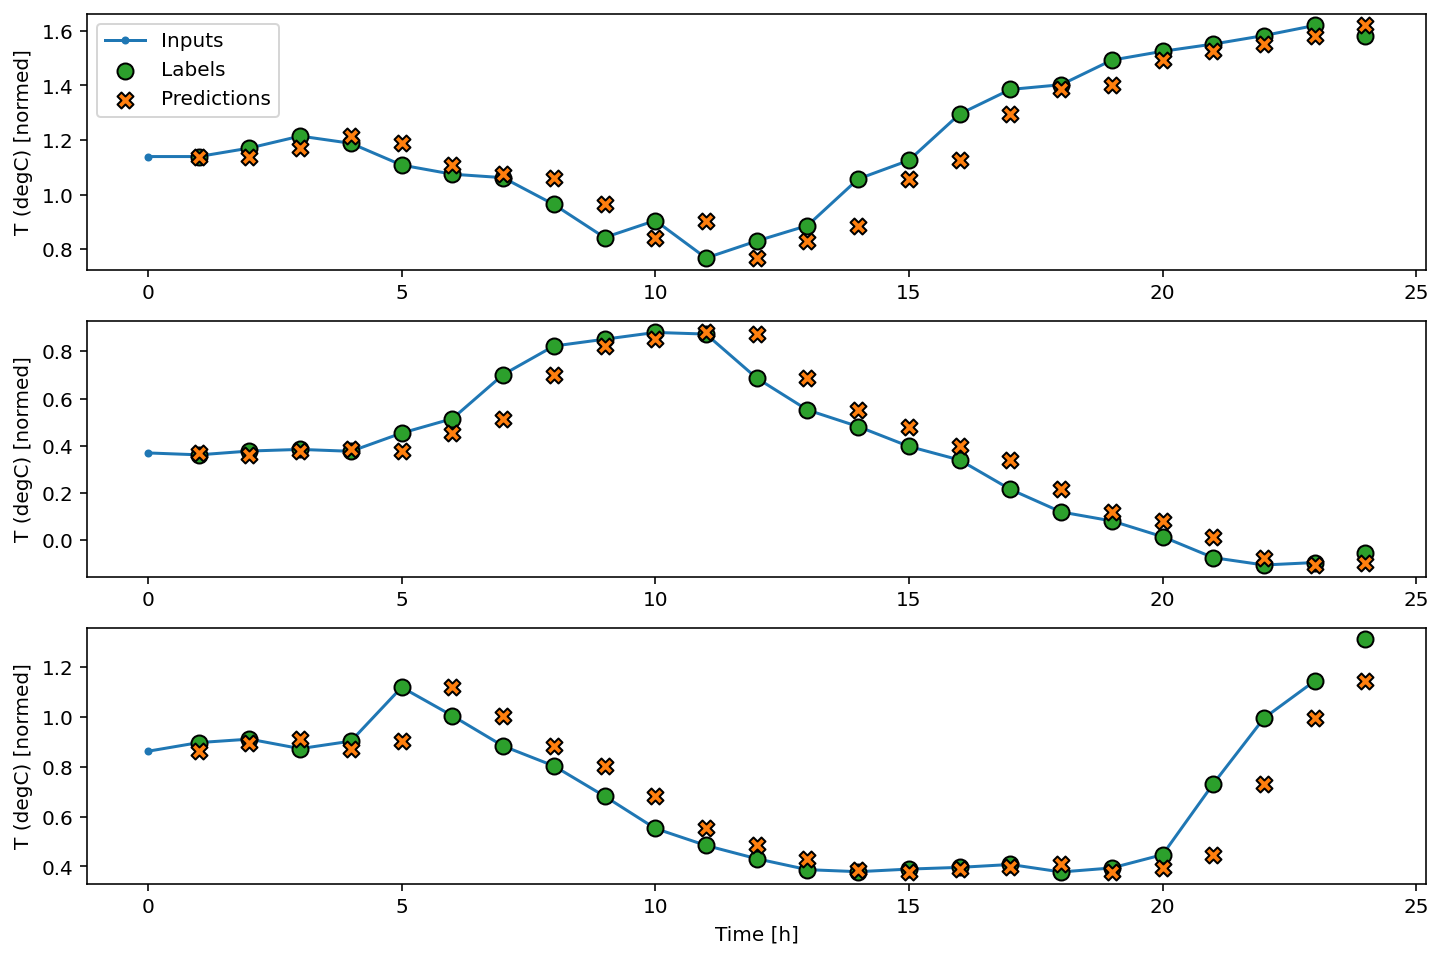

In [36]:
wide_window.plot(baseline)

#### 这儿可以看到Baseline Model做的事情就是copy昨天的数据到今天，当成预测

In [37]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [38]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [39]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    # 设置早停回调函数
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    # 设置损失函数， 优化器， 指标
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    # 训练损失，误差曲线
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [59]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0090 - mean_absolute_error: 0.0696 - val_loss: 0.0087 - val_mean_absolute_error: 0.0680
Epoch 2/20
1534/1534 [==============================] - 1s 942us/step - loss: 0.0090 - mean_absolute_error: 0.0695 - val_loss: 0.0086 - val_mean_absolute_error: 0.0680
Epoch 3/20
1534/1534 [==============================] - 1s 869us/step - loss: 0.0090 - mean_absolute_error: 0.0695 - val_loss: 0.0088 - val_mean_absolute_error: 0.0684
Epoch 4/20
439/439 [==============================] - 0s 642us/step - loss: 0.0087 - mean_absolute_error: 0.0680


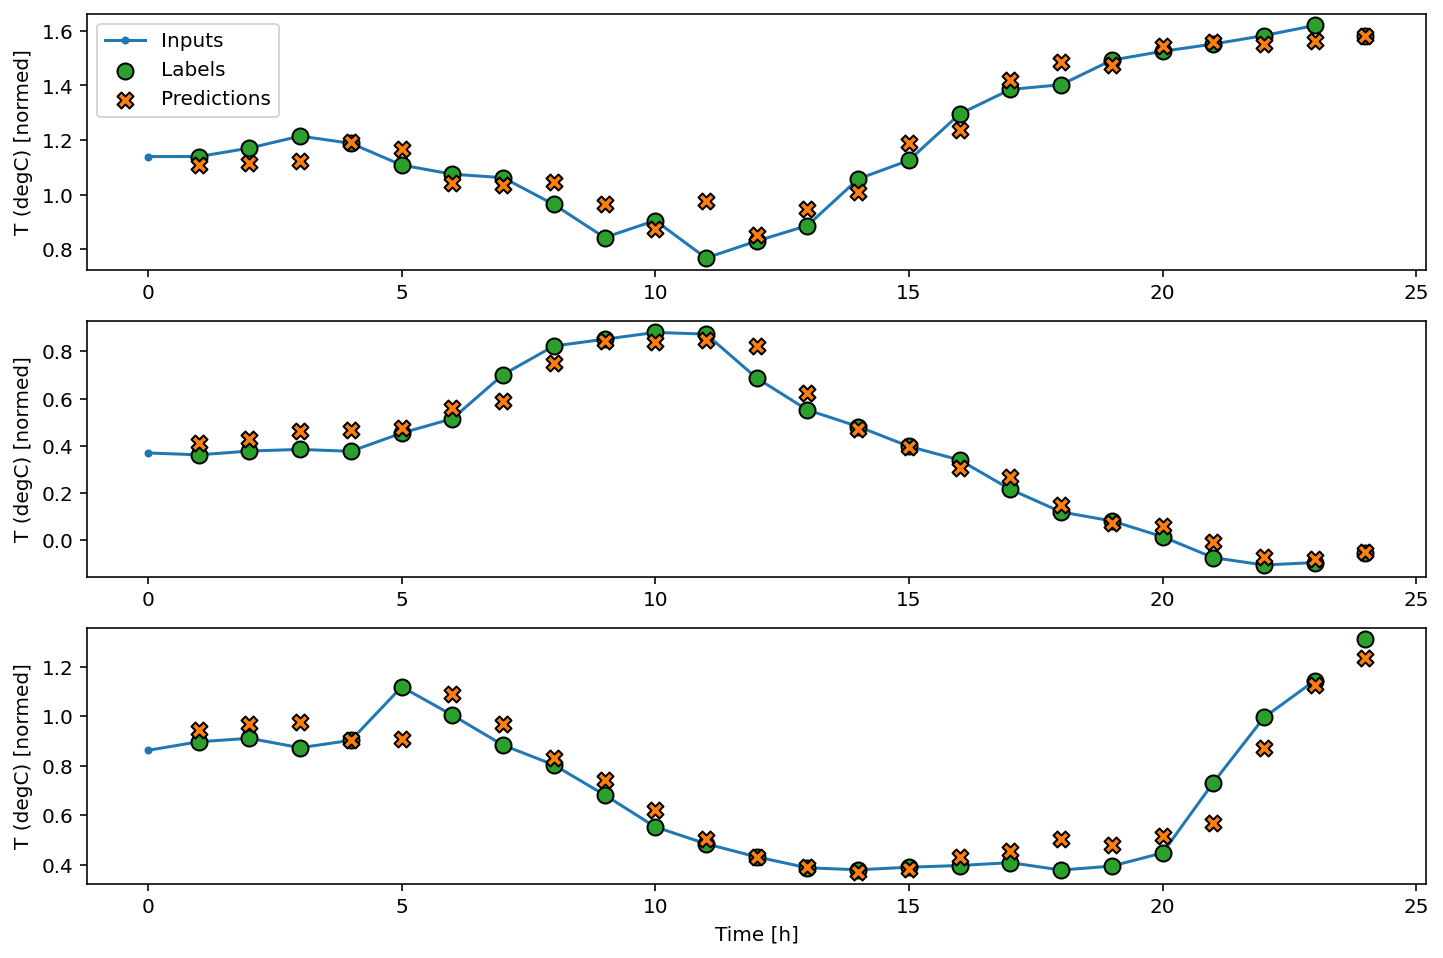

In [60]:
wide_window.plot(linear)

#### 我们发现了这个model比linear好了一点

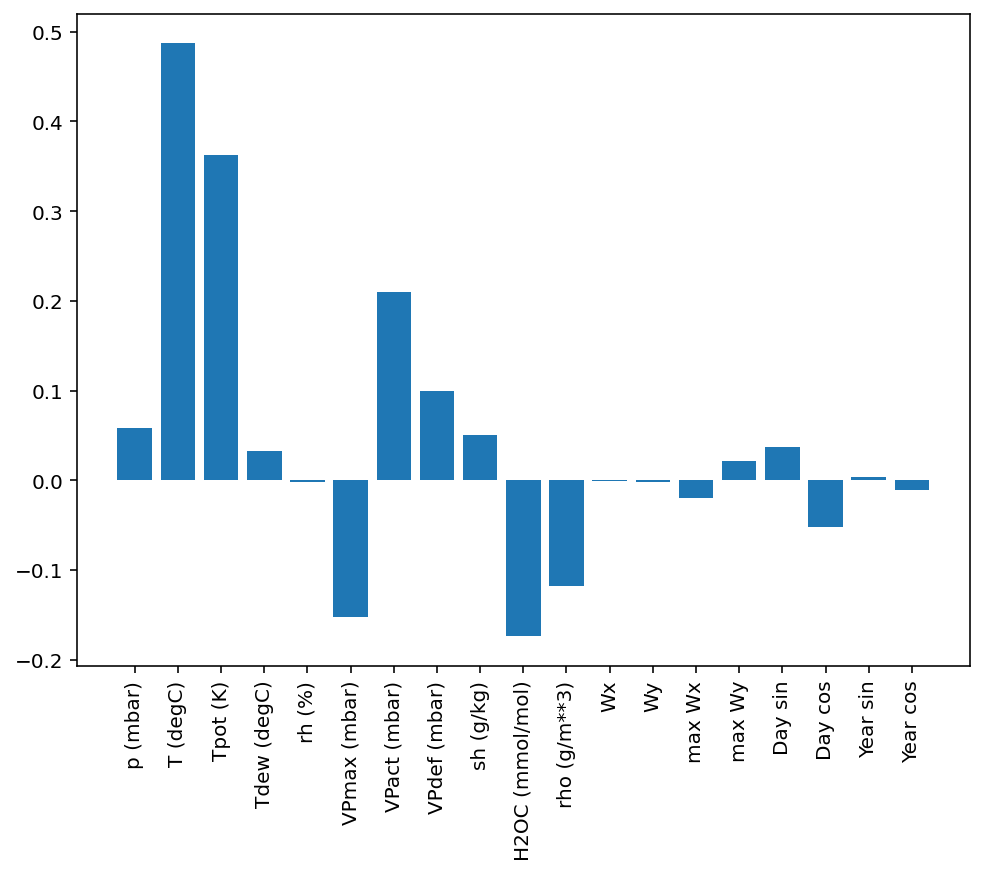

In [61]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

#### 还可以给model加一点非线性

In [62]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 3s 1ms/step - loss: 0.0123 - mean_absolute_error: 0.0761 - val_loss: 0.0080 - val_mean_absolute_error: 0.0655
Epoch 2/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0637 - val_loss: 0.0073 - val_mean_absolute_error: 0.0617
Epoch 3/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0074 - mean_absolute_error: 0.0620 - val_loss: 0.0071 - val_mean_absolute_error: 0.0607
Epoch 4/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0072 - mean_absolute_error: 0.0606 - val_loss: 0.0068 - val_mean_absolute_error: 0.0592
Epoch 5/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0071 - mean_absolute_error: 0.0603 - val_loss: 0.0068 - val_mean_absolute_error: 0.0591
Epoch 6/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0069 - mean_absolute_error: 0.0592 - val_loss: 0.0066 - val_mean_absolute_error: 0.0574
Epoc

### 基于AutoRegressive的神经网络

In [66]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

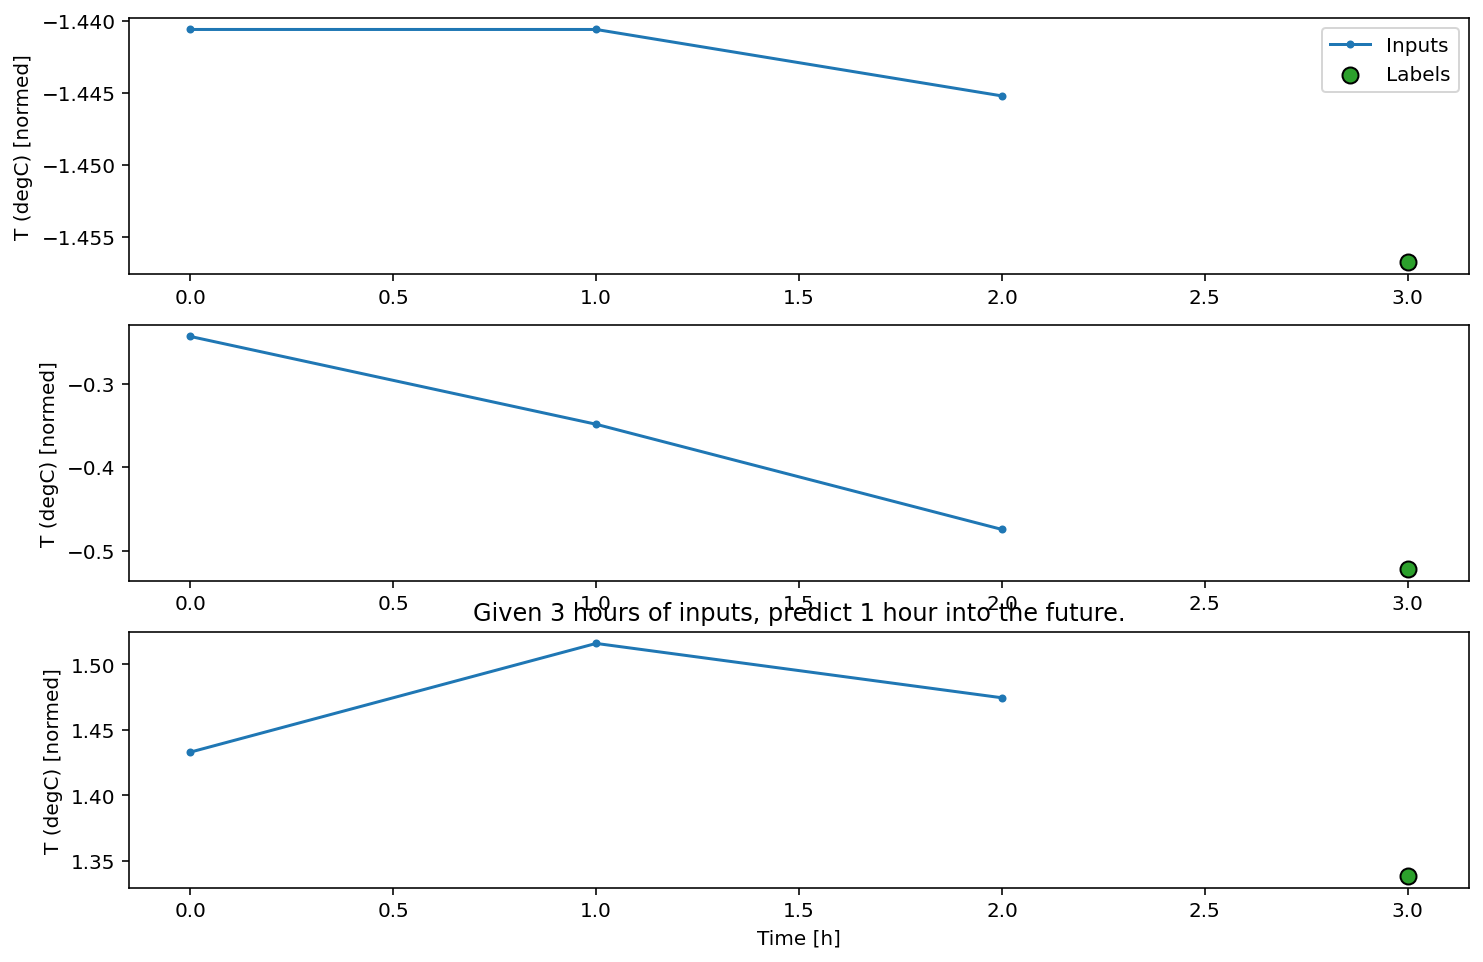

In [67]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

#### Flatten的深度神经网络

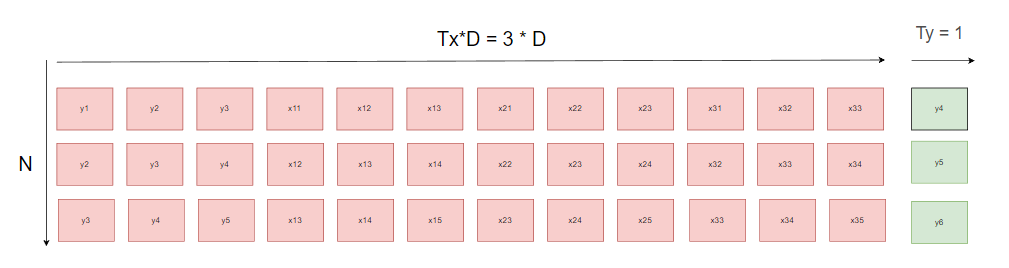


In [72]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

**只有一个输出**

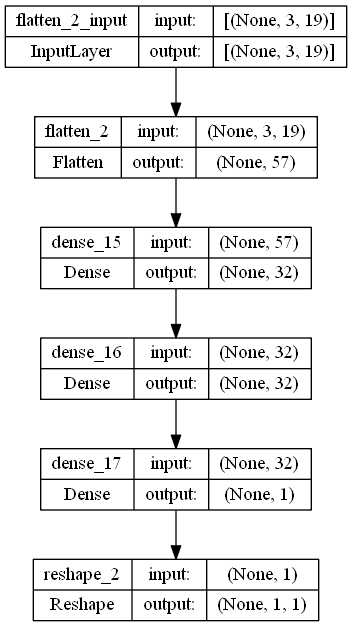

In [84]:
plot_model(multi_step_dense, show_shapes=True)

In [73]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [74]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 0s 659us/step - loss: 0.0072 - mean_absolute_error: 0.0616


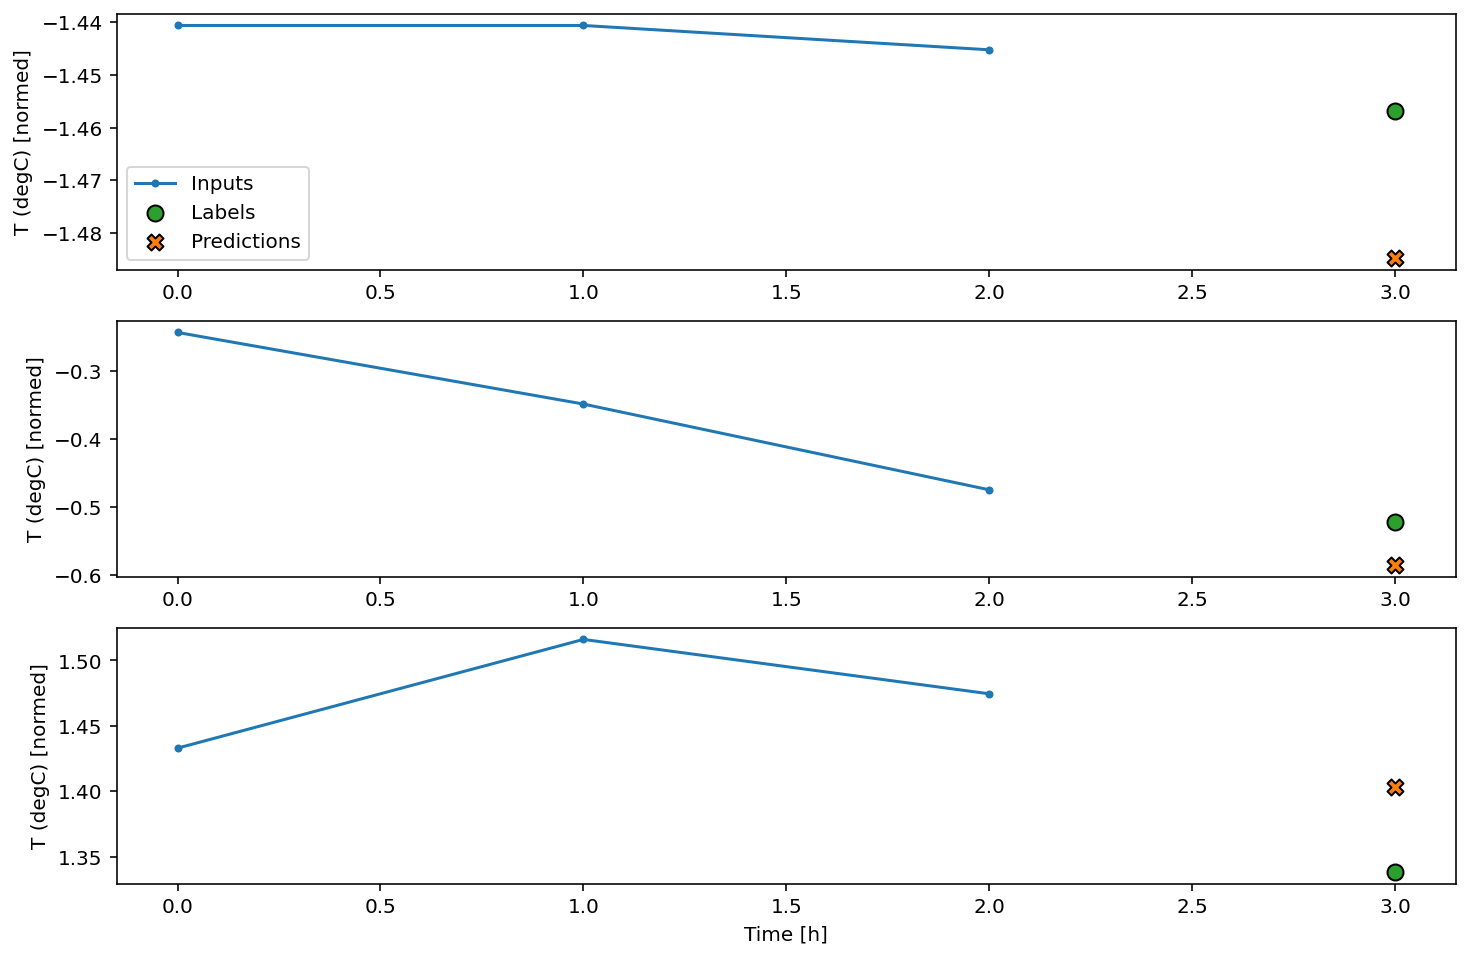

In [75]:
conv_window.plot(multi_step_dense)

### 利用卷积网络做一个AR(3)模型

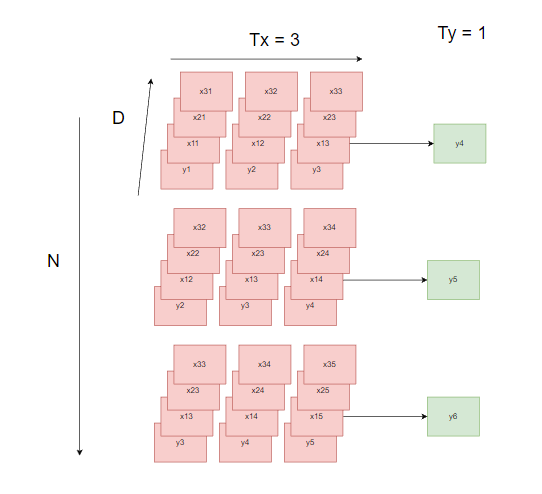

In [76]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

**每个时间步上都有一个输出**

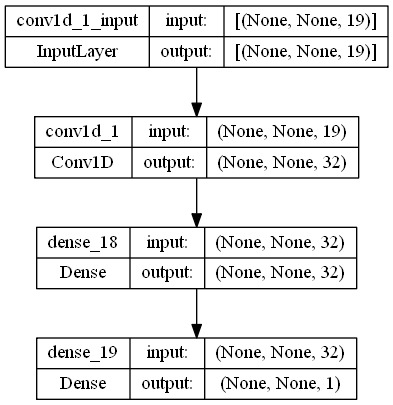

In [85]:
plot_model(conv_model, show_shapes=True)

In [77]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 0s 716us/step - loss: 0.0062 - mean_absolute_error: 0.0548


In [78]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


### AR(24) - Onestep forward

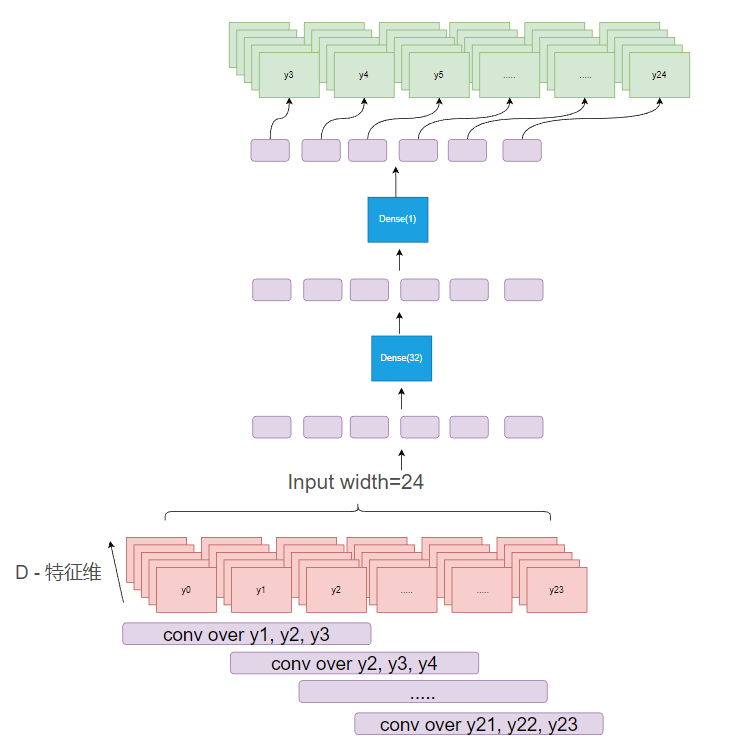

In [89]:
LABEL_WIDTH = 24
# 这里因为卷积操作会损失时间序列长度，我们设置了label width， 就不能写死 input_width
# 不然每次变换卷积核，都要重新计算窗口长度
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [90]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


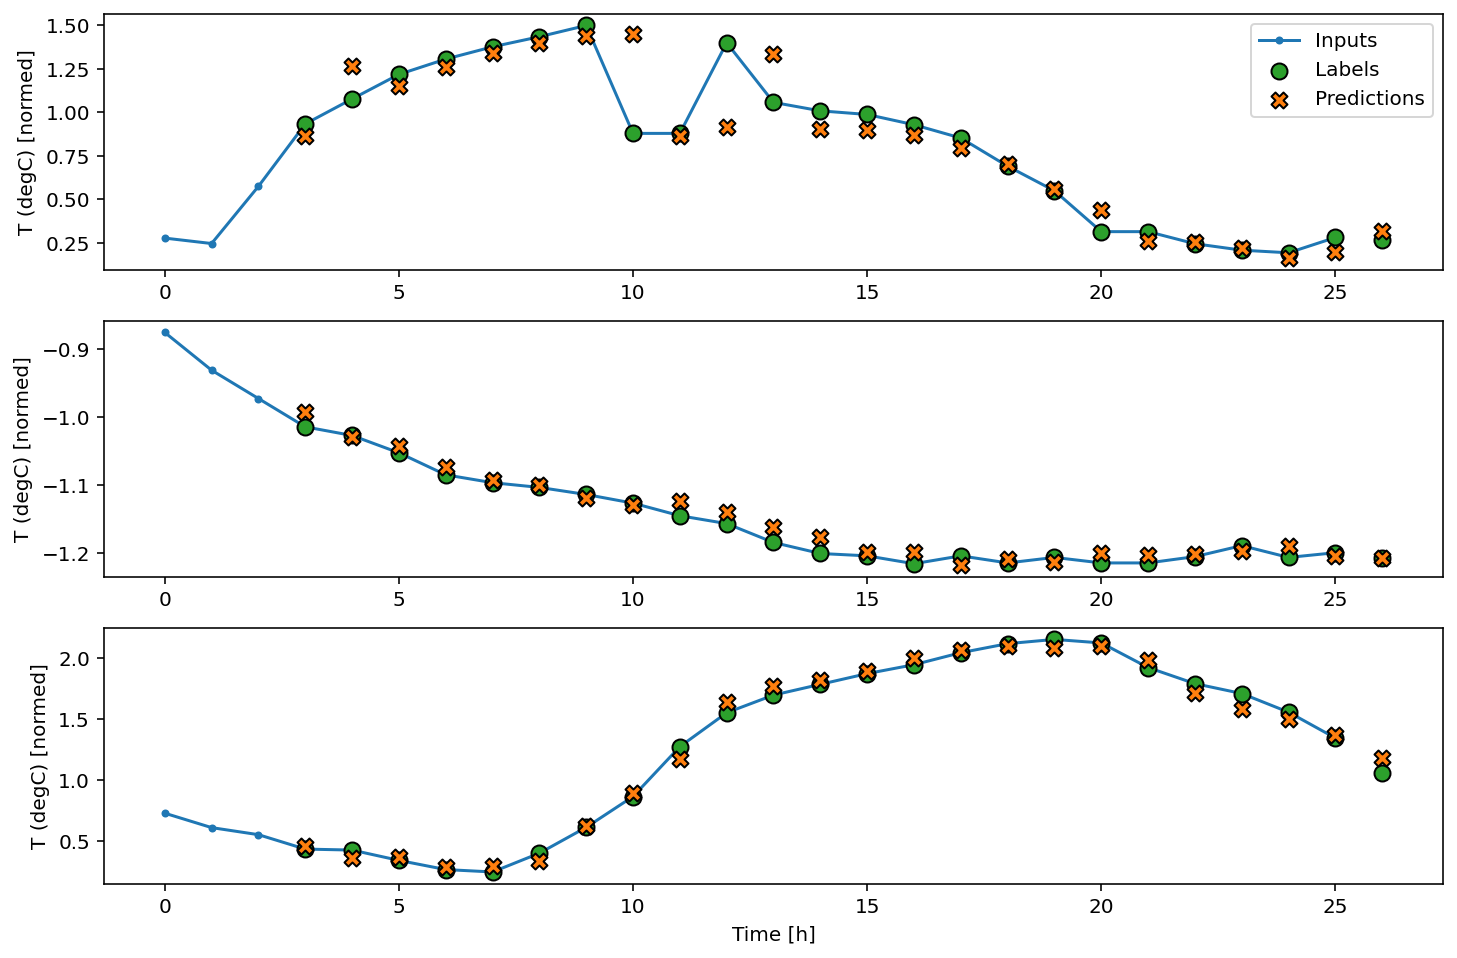

In [91]:
wide_conv_window.plot(conv_model)

**但这仍然是一个单步模型，且必须输入19个特征才行**